In [1]:
# All imports
import urllib.request
import zipfile
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score


# Downloading and loading the dataset

In [2]:

# Download the dataset : Commented out as the dataset is already downloaded
# url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
# filename = "data/bank-additional.zip"
# urllib.request.urlretrieve(url, filename)


('data/bank-additional.zip', <http.client.HTTPMessage at 0x132c7c5c0>)

In [3]:
# Unzip the file: Commented out as the dataset is already downloaded
# with zipfile.ZipFile(filename,'r') as zip_ref:
#     zip_ref.extractall("./data/")


In [4]:
# Load the dataset
data = pd.read_csv("data/bank-additional/bank-additional-full.csv", sep=";")
# Print a sample of the dataset
print("First few rows of the dataset:")
print(data.head())
# Print feature names
print("\nFeatures in the dataset:")
print(data.columns.tolist())
# Display basic information about the dataset
print("\nDataset info:")
print(data.info())

First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Preprocessing

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [8]:
# categorical columns: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome

# encode the categorical columns using one-hot encoding

df = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'])
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,True,False,False,False,False,True,False,True,False


In [9]:
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [10]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_no,y_yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,True,False,False,False,False,True,False,True,False
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,True,False,False,False,False,True,False,True,False
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,True,False,False,False,False,True,False,True,False
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,True,False,False,False,False,True,False,True,False
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168,...,False,True,False,False,False,False,True,False,True,False


In [11]:
df['y_yes'].value_counts()

y_yes
False    36548
True      4640
Name: count, dtype: int64

In [12]:
X = df.drop(columns=['y_yes', 'y_no'])
y = df['y_yes']

In [13]:
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

In [14]:
y_resampled.value_counts()

y_yes
False    36548
True     36548
Name: count, dtype: int64

In [15]:
X, y = X_resampled, y_resampled

# Feature Engineering

## Feature Selection

In [16]:
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
df

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,y_yes
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,False,False,True,False,False,False,False,True,False,False
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,False,False,True,False,False,False,False,True,False,False
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,False,False,True,False,False,False,False,True,False,False
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,False,False,True,False,False,False,False,True,False,False
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.712460,0.331680,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,1.981697,0.154282,-0.565922,-5.101449,5.712397,-2.216433,-1.612026,2.268077,-1.675784,-2.069683,...,False,False,True,False,False,True,True,False,False,True
73092,-0.386145,1.318622,-0.204909,0.195414,-0.349494,0.839061,0.591424,-0.474791,0.773254,0.845170,...,False,False,False,False,False,True,False,True,False,True
73093,-1.153816,1.926560,-0.204909,0.195414,-0.349494,0.839061,0.591424,-0.474791,0.774575,0.845170,...,False,False,False,True,False,False,False,True,False,True
73094,3.532304,-0.305186,-0.515703,0.195414,1.671136,-1.081150,0.821069,0.499960,-1.577619,-2.482066,...,True,False,False,True,True,False,True,False,False,True


In [17]:
df['y_yes'].value_counts()

y_yes
False    36548
True     36548
Name: count, dtype: int64

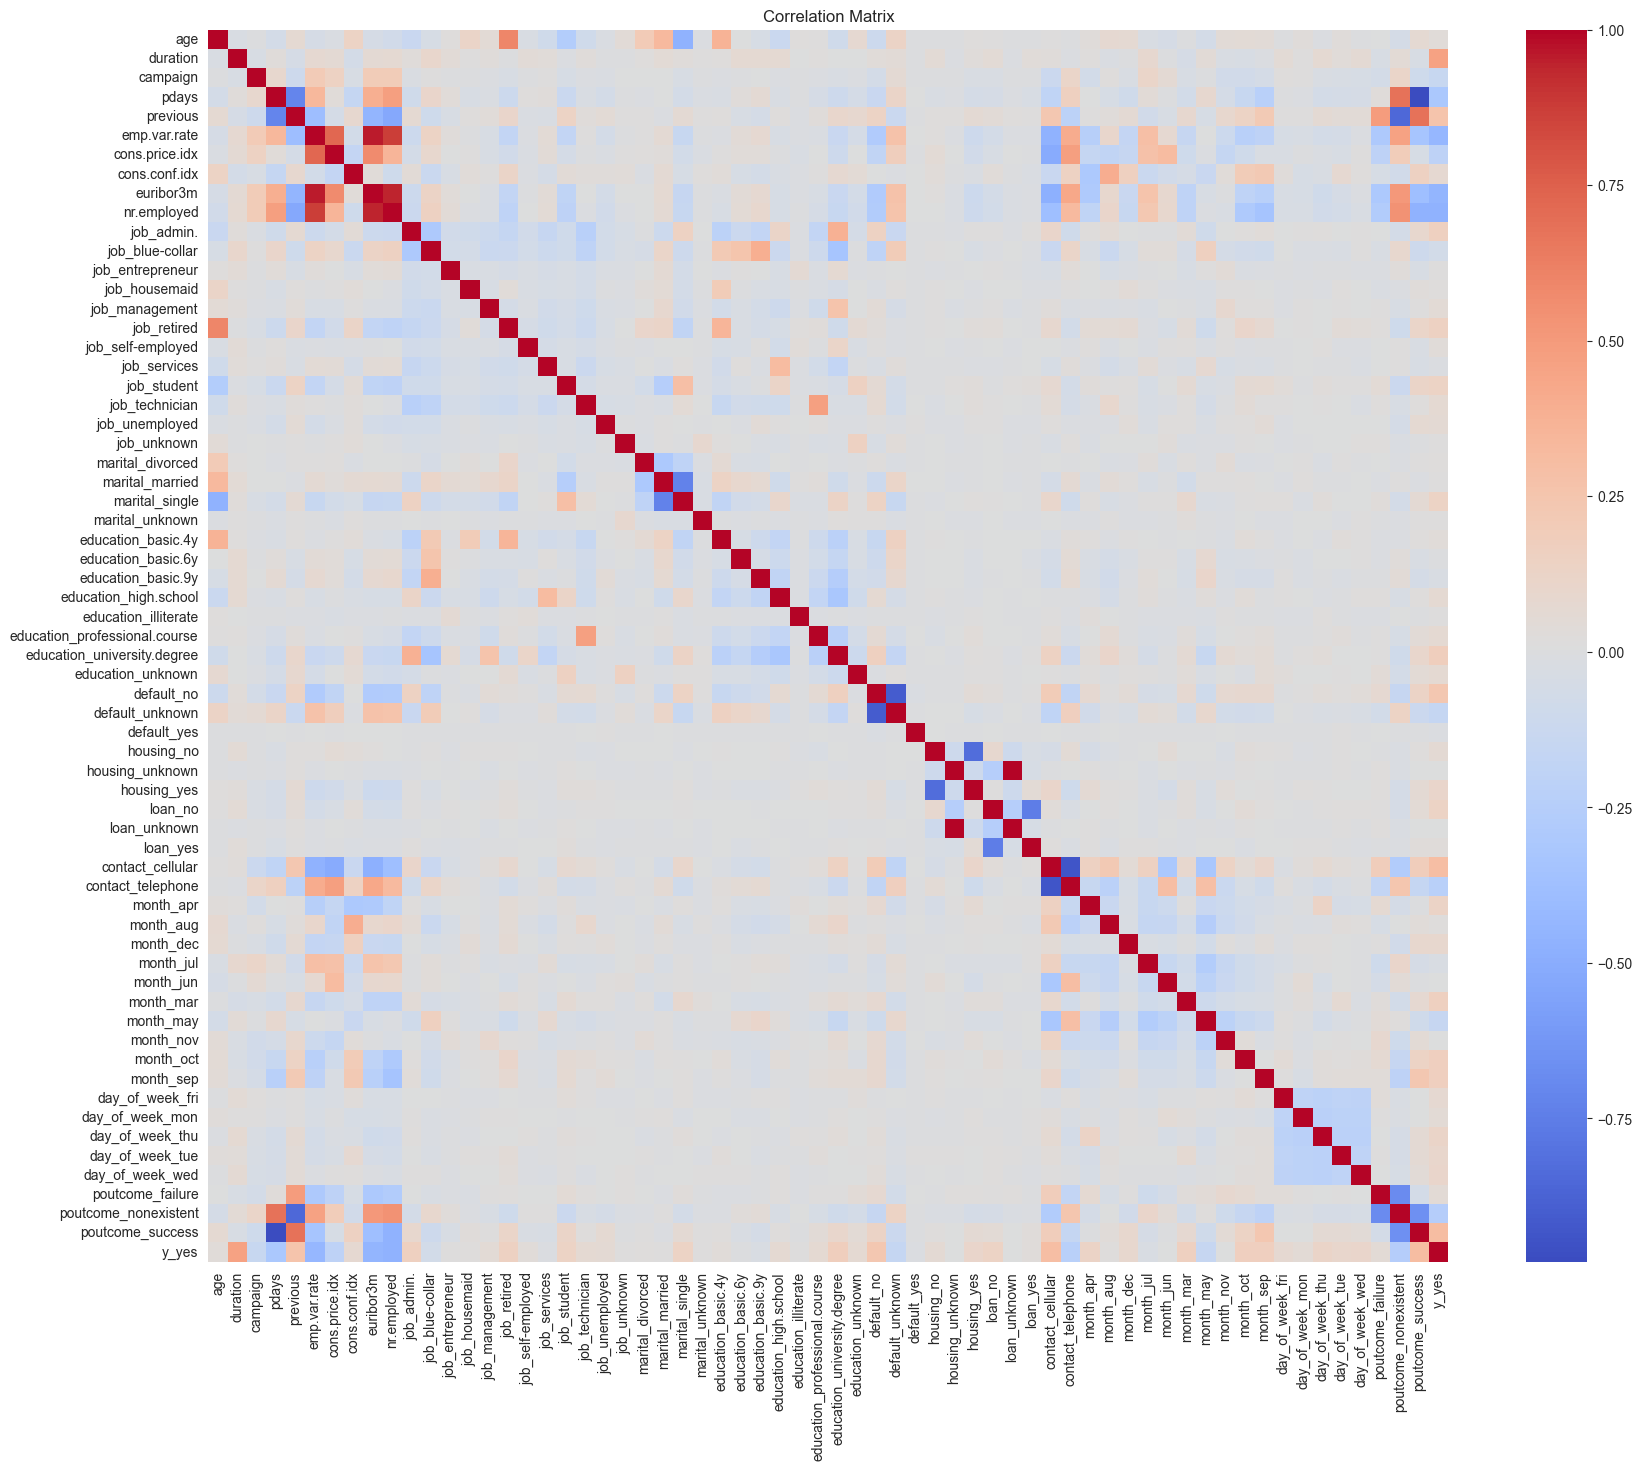

In [18]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 

In [19]:
target_corr = correlation_matrix['y_yes'].sort_values(ascending=False)
print(target_corr)
target_corr.drop(index='y_yes', inplace=True)

y_yes                   1.000000
duration                0.464213
poutcome_success        0.307723
contact_cellular        0.299446
previous                0.260053
                          ...   
poutcome_nonexistent   -0.255444
pdays                  -0.309584
emp.var.rate           -0.432485
euribor3m              -0.449330
nr.employed            -0.468995
Name: y_yes, Length: 64, dtype: float64


In [20]:
target_corr = target_corr.abs()
print(target_corr.describe())


count    63.000000
mean      0.119868
std       0.120445
min       0.000411
25%       0.024235
50%       0.079179
75%       0.160808
max       0.468995
Name: y_yes, dtype: float64


In [21]:
first_quartile = target_corr.quantile(0.25)
# take top 75% of the features

selected_features = target_corr[target_corr > first_quartile].index.tolist()
print(len(selected_features))

47


In [22]:
target_corr

duration                0.464213
poutcome_success        0.307723
contact_cellular        0.299446
previous                0.260053
default_no              0.236178
                          ...   
poutcome_nonexistent    0.255444
pdays                   0.309584
emp.var.rate            0.432485
euribor3m               0.449330
nr.employed             0.468995
Name: y_yes, Length: 63, dtype: float64

In [23]:
# # select features with target_corr less than 0.1
# selected_features = target_corr[abs(target_corr) > 0.05].index.tolist()
# print(len(selected_features))
# selected_features


In [24]:
X_selected = df[selected_features]
X_selected

,duration,poutcome_success,contact_cellular,previous,default_no,education_university.degree,month_oct,month_sep,job_admin.,month_mar,...,campaign,month_may,default_unknown,cons.price.idx,contact_telephone,poutcome_nonexistent,pdays,emp.var.rate,euribor3m,nr.employed
0,0.010471,False,False,-0.349494,True,False,False,False,False,False,...,-0.565922,True,False,0.722722,True,True,0.195414,0.648092,0.712460,0.331680
1,-0.421501,False,False,-0.349494,False,False,False,False,False,False,...,-0.565922,True,True,0.722722,True,True,0.195414,0.648092,0.712460,0.331680
2,-0.124520,False,False,-0.349494,True,False,False,False,False,False,...,-0.565922,True,False,0.722722,True,True,0.195414,0.648092,0.712460,0.331680
3,-0.413787,False,False,-0.349494,True,False,False,False,True,False,...,-0.565922,True,False,0.722722,True,True,0.195414,0.648092,0.712460,0.331680
4,0.187888,False,False,-0.349494,True,False,False,False,False,False,...,-0.565922,True,False,0.722722,True,True,0.195414,0.648092,0.712460,0.331680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73091,0.154282,False,True,5.712397,True,False,True,False,False,False,...,-0.565922,False,False,-1.612026,False,False,-5.101449,-2.216433,-1.675784,-2.069683
73092,1.318622,False,True,-0.349494,True,True,False,False,True,False,...,-0.204909,False,False,0.591424,False,True,0.195414,0.839061,0.773254,0.845170
73093,1.926560,False,True,-0.349494,True,True,False,False,True,False,...,-0.204909,False,False,0.591424,False,True,0.195414,0.839061,0.774575,0.845170
73094,-0.305186,False,True,1.671136,True,False,False,True,False,False,...,-0.515703,False,False,0.821069,False,False,0.195414,-1.081150,-1.577619,-2.482066


In [25]:
X, y = X_selected, df['y_yes']

## PCA

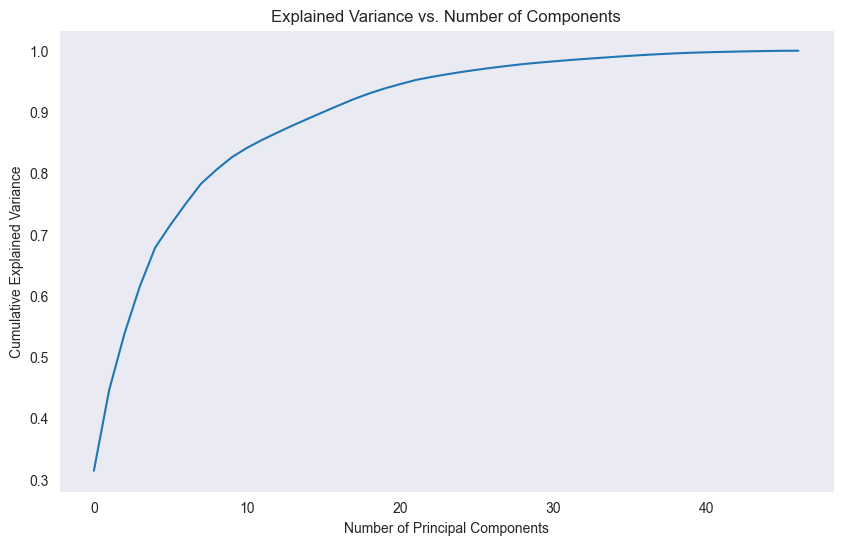

In [26]:
pca = PCA()
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()



In [27]:
pca = PCA(n_components=30)
X_pca = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumsum = np.cumsum(explained_variance_ratio)
print( "Explained variance: ", cumsum[-1])

Explained variance:  0.9804232868754125


In [28]:
X_pca

array([[ 1.83987317, -0.96828047, -1.1716567 , ...,  0.04161925,
         0.2284169 , -0.05778803],
       [ 1.88612976, -1.00258154, -1.57747877, ...,  0.17977413,
        -0.08479006,  0.01950467],
       [ 1.88812316, -0.84963285, -0.90634984, ...,  0.17892609,
        -0.09183101,  0.04159016],
       ...,
       [ 2.23793807, -0.92426676,  1.67509901, ...,  0.19712996,
        -0.05357588,  0.01392592],
       [-2.11966163,  0.50548181, -1.25000706, ..., -0.27662991,
        -0.11396566,  0.51284958],
       [-0.13783855,  1.60233069,  3.27607584, ...,  0.37620516,
         0.10371861,  0.29547545]])

# Model Training

In [29]:
X, y = X_pca, y
X

array([[ 1.83987317, -0.96828047, -1.1716567 , ...,  0.04161925,
         0.2284169 , -0.05778803],
       [ 1.88612976, -1.00258154, -1.57747877, ...,  0.17977413,
        -0.08479006,  0.01950467],
       [ 1.88812316, -0.84963285, -0.90634984, ...,  0.17892609,
        -0.09183101,  0.04159016],
       ...,
       [ 2.23793807, -0.92426676,  1.67509901, ...,  0.19712996,
        -0.05357588,  0.01392592],
       [-2.11966163,  0.50548181, -1.25000706, ..., -0.27662991,
        -0.11396566,  0.51284958],
       [-0.13783855,  1.60233069,  3.27607584, ...,  0.37620516,
         0.10371861,  0.29547545]])

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [31]:
y_test.value_counts()

y_yes
False    10965
True     10964
Name: count, dtype: int64

## Random Forest

In [32]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],             # Maximum depth of each tree
    'min_samples_split': [5, 10],             # Minimum samples to split a node
    'min_samples_leaf':  [2, 4],               # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features to consider for the best split
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv = stratified_kfold, 
                                   n_iter=20, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Parameters from Randomized Search:", best_params)
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/sklearn/base.py", line 666, in 

Best Parameters from Randomized Search: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}


In [33]:
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9377080578229742
Classification Report:
               precision    recall  f1-score   support

       False       0.97      0.90      0.94     10965
        True       0.91      0.97      0.94     10964

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929

Confusion Matrix:
 [[ 9886  1079]
 [  287 10677]]


In [46]:
# Define the scoring metrics you want to calculate during cross-validation
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'), 
    'accuracy': 'accuracy'
}

# Perform cross-validation and get scores for precision, recall, and F1-score
cv_results = cross_validate(best_rf, X, y, cv=stratified_kfold, scoring=scoring)

# Print the cross-validation metrics
print(f"Cross-Validation Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"Cross-Validation Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")


Cross-Validation Precision: 0.94 ± 0.00
Cross-Validation Recall: 0.94 ± 0.00
Cross-Validation F1 Score: 0.94 ± 0.00
Cross-Validation Accuracy: 0.94 ± 0.00


## Logistic Regression

In [35]:
log_reg = LogisticRegression(random_state=42)

param_dist = {
    'C': np.logspace(-4, 4, 20),            # Regularization strength
    'penalty': ['l2'],                      # Regularization type
    'solver': ['liblinear', 'lbfgs'],       # Solver for optimization
}

random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist,
                                   n_iter=20, cv=stratified_kfold, n_jobs=-1,
                                   verbose=2, random_state=42, scoring='accuracy')

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_lr_model = random_search.best_estimator_

print("Best Parameters from Randomized Search:", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from Randomized Search: {'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(0.615848211066026)}


In [36]:
y_pred = best_lr_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8993114141091705
Classification Report:
               precision    recall  f1-score   support

       False       0.90      0.89      0.90     10965
        True       0.89      0.91      0.90     10964

    accuracy                           0.90     21929
   macro avg       0.90      0.90      0.90     21929
weighted avg       0.90      0.90      0.90     21929

Confusion Matrix:
 [[9787 1178]
 [1030 9934]]


In [45]:
# cv_scores = cross_val_score(best_model, X, y, cv=stratified_kfold)
# 
# print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

# Define the scoring metrics you want to calculate during cross-validation
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'), 
    'accuracy': 'accuracy'
}

# Perform cross-validation and get scores for precision, recall, and F1-score
cv_results = cross_validate(best_lr_model, X, y, cv=stratified_kfold, scoring=scoring)

# Print the cross-validation metrics
print(f"Cross-Validation Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"Cross-Validation Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")


Cross-Validation Precision: 0.90 ± 0.00
Cross-Validation Recall: 0.90 ± 0.00
Cross-Validation F1 Score: 0.90 ± 0.00
Cross-Validation Accuracy: 0.90 ± 0.00


## SVM

In [38]:
svm = SVC(random_state=42)

param_dist = {
    'C': np.logspace(-1, 1, 3),              # Regularization strength; controls the trade-off between misclassification and margin maximization
    'kernel': ['rbf', 'poly'],      # Type of kernel function; linear, radial basis, and polynomial
    'gamma': ['scale', 'auto']                # Kernel coefficient; important for RBF and polynomial kernels
}

In [39]:
random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist,
                                   n_iter=20, cv=stratified_kfold, n_jobs=-1,
                                   verbose=2, random_state=42, scoring='accuracy')

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_svm_model = random_search.best_estimator_

print("Best Parameters from Randomized Search:", best_params)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 12 is smaller than n_iter=20. Running 12 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  47.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  23.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=  17.4s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  12.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  22.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=200; total time=  41.2s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  34.2s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  11.5s
[CV] END max_depth=30, max_feat

/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  38.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  45.5s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  37.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  14.8s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  34.9s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  23.6s
[CV] END max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=  16.9s
[CV] END C=0.23357214690901212, p

In [40]:
y_pred = best_svm_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9387112955447124
Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.91      0.94     10965
        True       0.92      0.96      0.94     10964

    accuracy                           0.94     21929
   macro avg       0.94      0.94      0.94     21929
weighted avg       0.94      0.94      0.94     21929

Confusion Matrix:
 [[10026   939]
 [  405 10559]]


In [43]:
# Define the scoring metrics you want to calculate during cross-validation
scoring = {
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'), 
    'accuracy': 'accuracy'
}

# Perform cross-validation and get scores for precision, recall, and F1-score
cv_results = cross_validate(best_svm_model, X, y, cv=stratified_kfold, scoring=scoring)

# Print the cross-validation metrics
print(f"Cross-Validation Precision: {cv_results['test_precision'].mean():.2f} ± {cv_results['test_precision'].std():.2f}")
print(f"Cross-Validation Recall: {cv_results['test_recall'].mean():.2f} ± {cv_results['test_recall'].std():.2f}")
print(f"Cross-Validation F1 Score: {cv_results['test_f1'].mean():.2f} ± {cv_results['test_f1'].std():.2f}")
print(f"Cross-Validation Accuracy: {cv_results['test_accuracy'].mean():.2f} ± {cv_results['test_accuracy'].std():.2f}")




Cross-Validation Precision: 0.94 ± 0.00
Cross-Validation Recall: 0.94 ± 0.00
Cross-Validation F1 Score: 0.94 ± 0.00
Cross-Validation Accuracy: 0.94 ± 0.00
